In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people["images"][0].shape

In [3]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

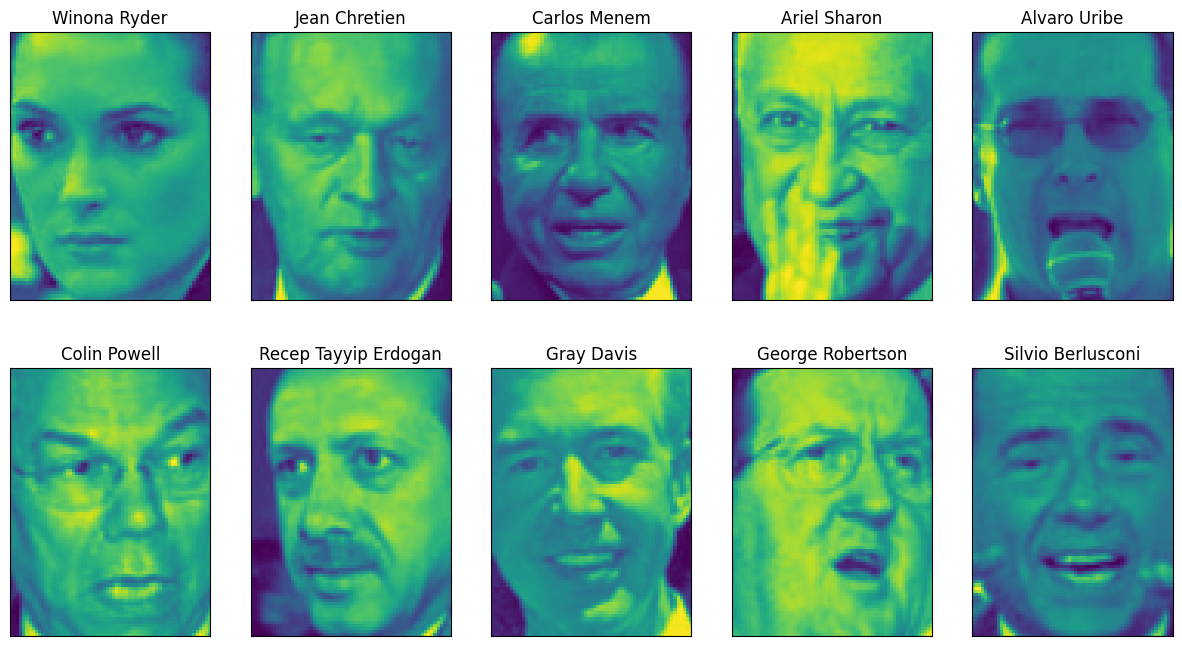

In [4]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={"xticks": (), "yticks": ()})
for target, image, ax in zip(people["target"], people["images"], axes.ravel()):
    ax.imshow(image)
    ax.set_title(people["target_names"][target])

In [5]:
A = np.arange(3, 20, 3)
np.where(A > 4)

(array([1, 2, 3, 4, 5], dtype=int64),)

In [6]:
mask = np.zeros(people["target"].shape, dtype=np.bool_)
for target in np.unique(people["target"]):
    # np.whereの戻り値がnumpy.ndarrayを中に含んだtupleのため[0]で取り出す
    # np.whereは満たすところのindexを返す
    mask[np.where(people["target"] == target)[0][:50]] = 1

X_people = people["data"][mask]
y_people = people["target"][mask]
    

In [15]:
people["data"].shape

(3023, 5655)

In [7]:
print(X_people.min(), X_people.max())

0.0 1.0


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.2596899224806202


In [10]:
import mglearn

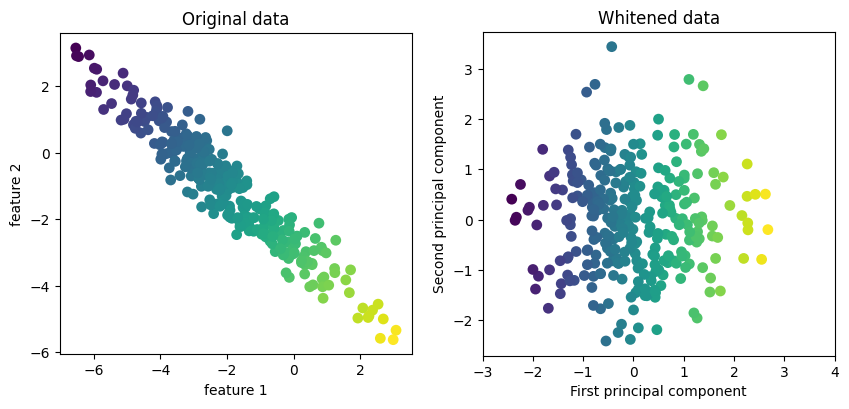

In [11]:
mglearn.plots.plot_pca_whitening()

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape, X_train_pca.shape)

(1547, 5655) (1547, 100)


In [16]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.32170542635658916

In [17]:
print(pca.components_.shape)

(100, 5655)


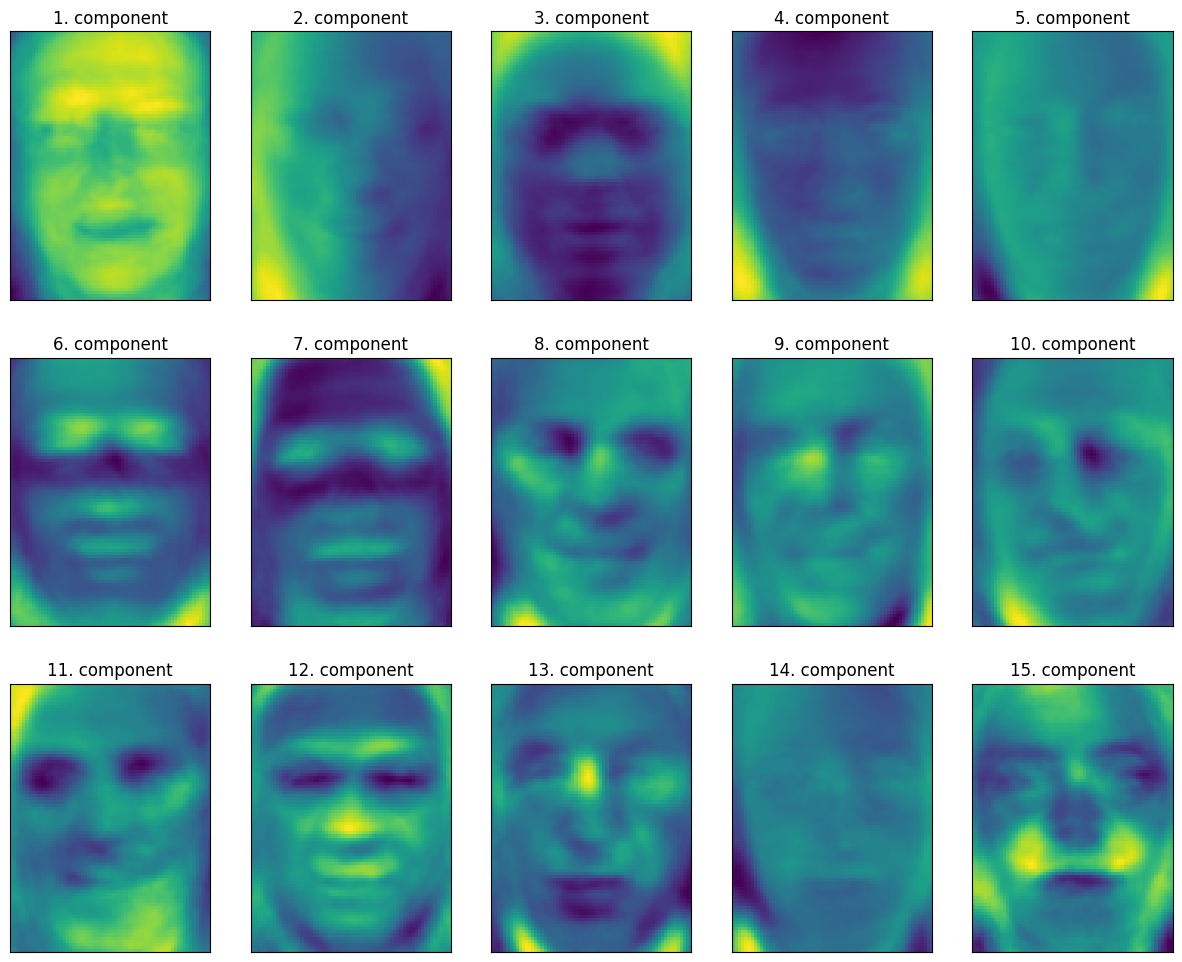

In [18]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={"xticks": (), "yticks": ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap="viridis")
    ax.set_title(f"{i + 1}. component")

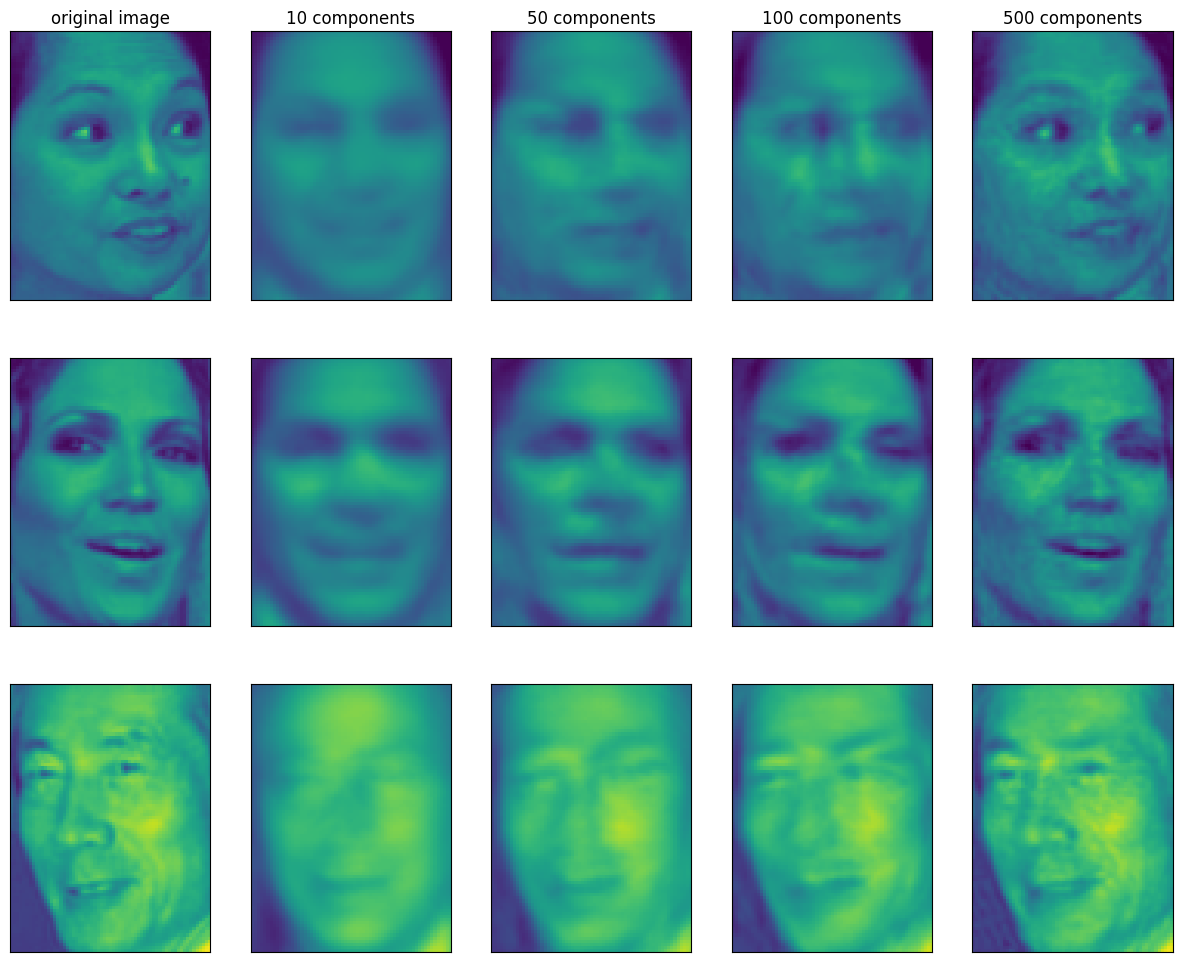

In [19]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

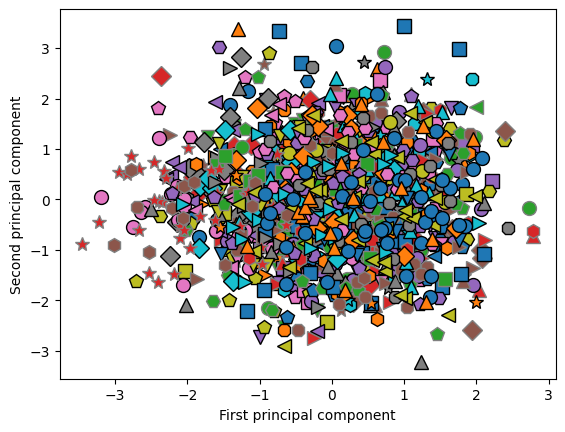

In [20]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")